# pythia-bias


In [1]:
from importlib import reload

from matplotlib import cm

from utils import plots, tables
#%matplotlib widget

In [2]:
# Knobs
paths = {
    # Max pooling, degree 1, 3 tilings
    'degree1_tiled_max': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_features.csv', 
    # Bias term only
    'degree1_biasonly': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_biasonly.csv',
    # Max pooling, degree 1, 3 tilings, epsilon ~1.8%, untimely reward = -1
    'degree1_tiled_max_tuned': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_tuned.csv', 
    # Bias term only, epsilon ~1.8%, untimely reward = -1
    'degree1_biasonly_tuned': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_biasonly_tuned.csv',
    # Baselines (e.g. BO)
    'degree1_baseline': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_features.csv',
}

suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    #('gap', 'one_phase')
]
metrics  = [
    'ipc_improvement', 
    'L2C_issued_prefetches', 
    #'L2C_accuracy', 
    'L2C_coverage',
    #'L2C_mpki_reduction', 
]
features = [
    {'Delta_Path', 'PC_Delta'},
    {'Delta_Path', 'PC_Delta', 'Page'},
    {'Delta_Path', 'PC_Delta', 'Page', 'Offset'},
]
baselines = [
    'bo', 'spp_dev2', 'bingo'
]
dpi = 150

# Plots (suites)
Fix prefetch degree to 1 for everything.

In [3]:
dfs = {
    'degree1_tiled_max': tables.load_stats_csv_pythia(paths['degree1_tiled_max'], features),
    'degree1_tiled_max_tuned': tables.load_stats_csv_pythia(paths['degree1_tiled_max_tuned'], features),
    'degree1_biasonly': tables.load_stats_csv(paths['degree1_biasonly'], ['pythia'], prefetchers_level='l2'),
    'degree1_biasonly_tuned': tables.load_stats_csv(paths['degree1_biasonly_tuned'], ['pythia'], prefetchers_level='l2'),
    'degree1_baseline': tables.load_stats_csv(paths['degree1_baseline'], baselines, prefetchers_level='l2'),
}

/u/cmolder/GitHub/pythia-analysis/utils/utils.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filter(regex='simpoint').fillna('default', inplace=True)
/u/cmolder/GitHub/pythia-analysis/utils/utils.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filter(regex='simpoint').fillna('default', inplace=True)
/u/cmolder/GitHub/pythia-analysis/utils/utils.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filter(regex='simpo

## mix1 vs. bias-only, BO

/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

=== spec06 weighted ===


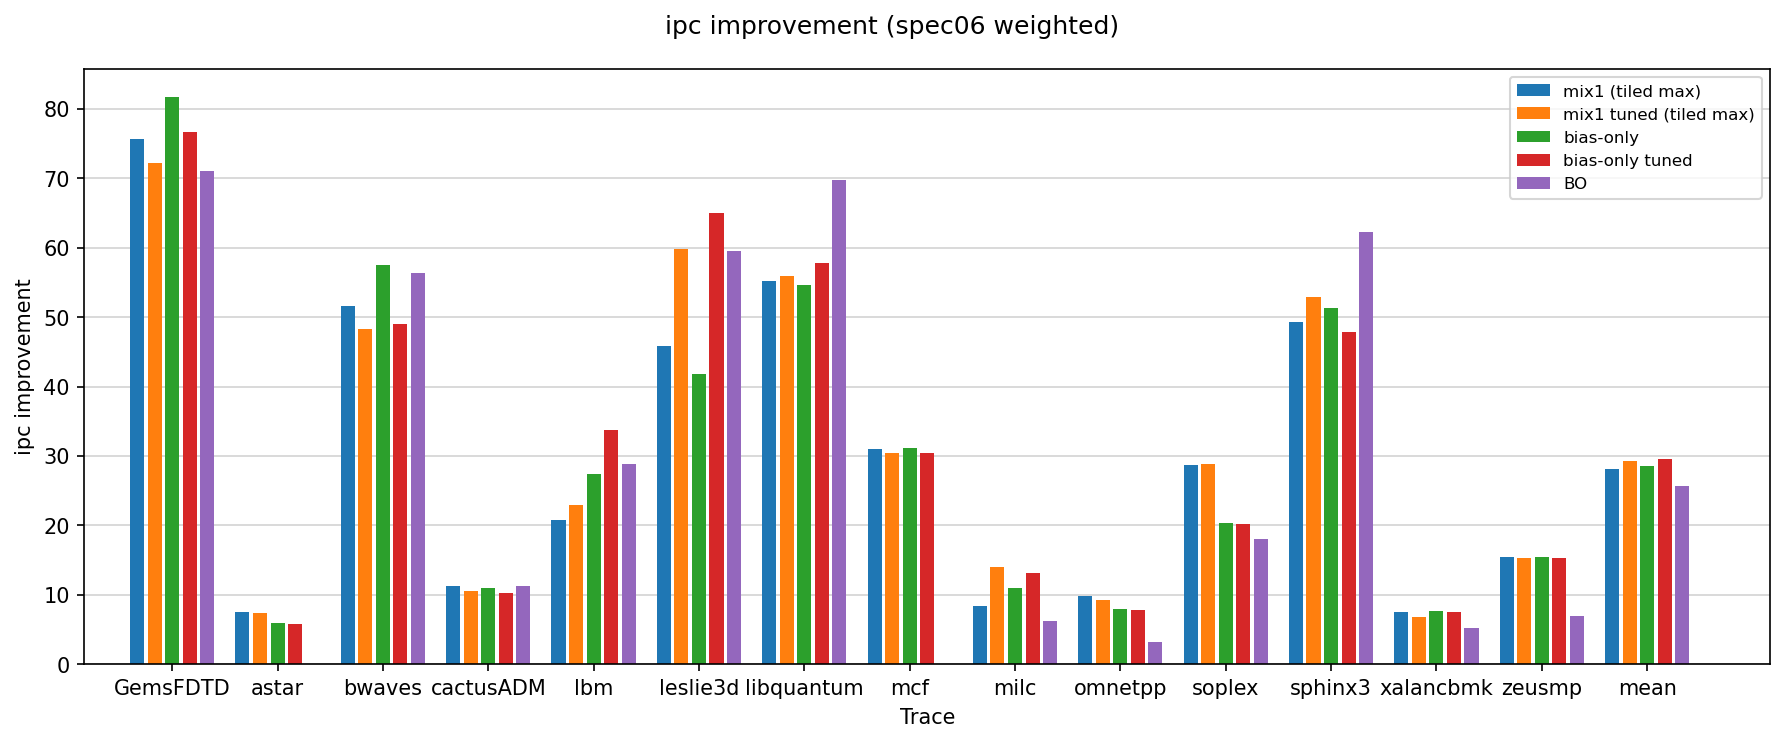

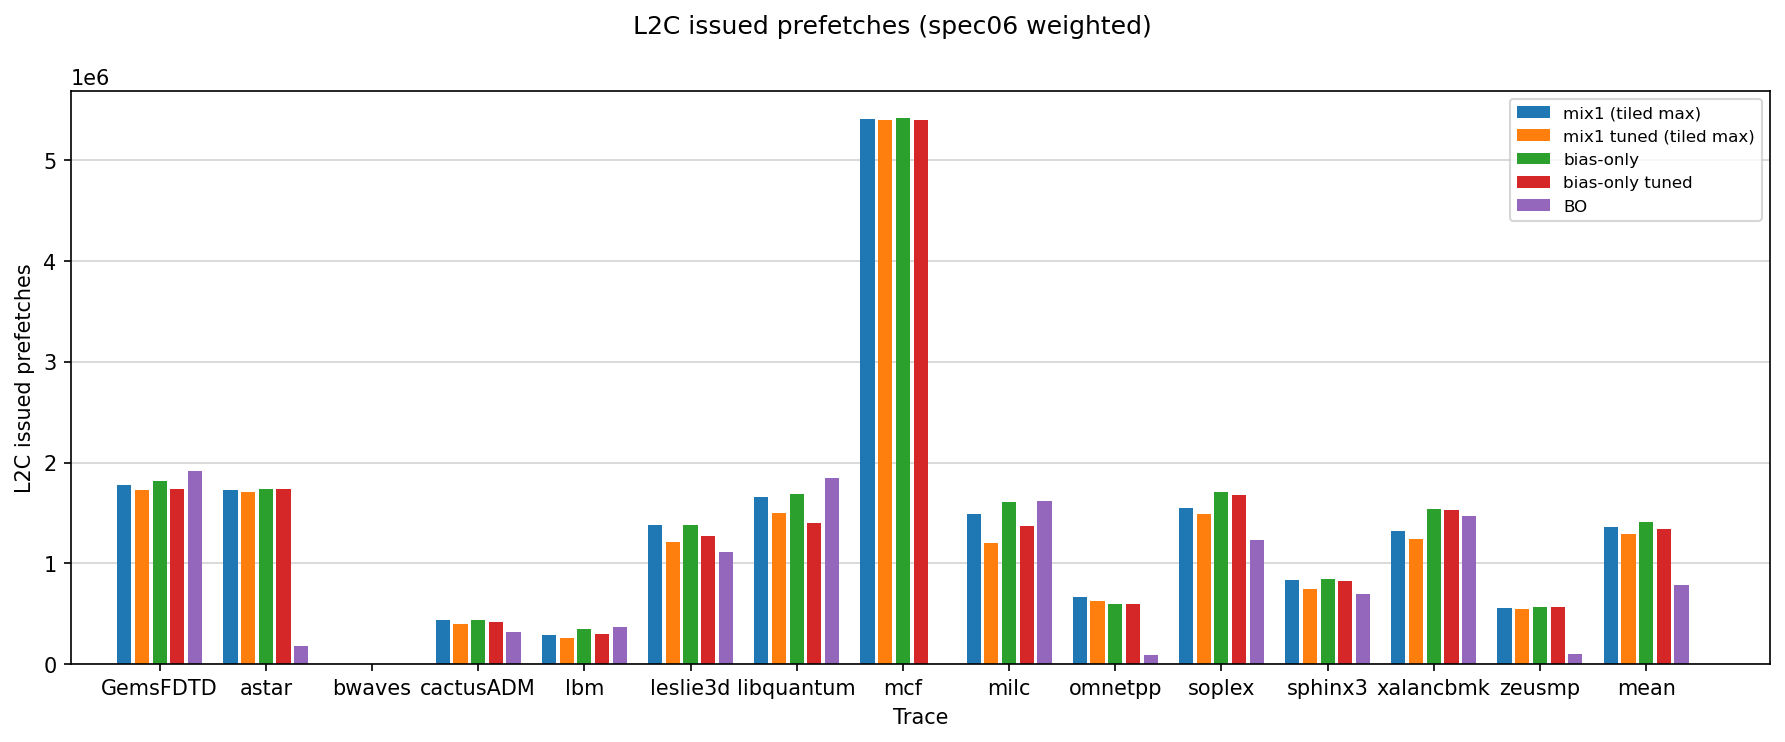

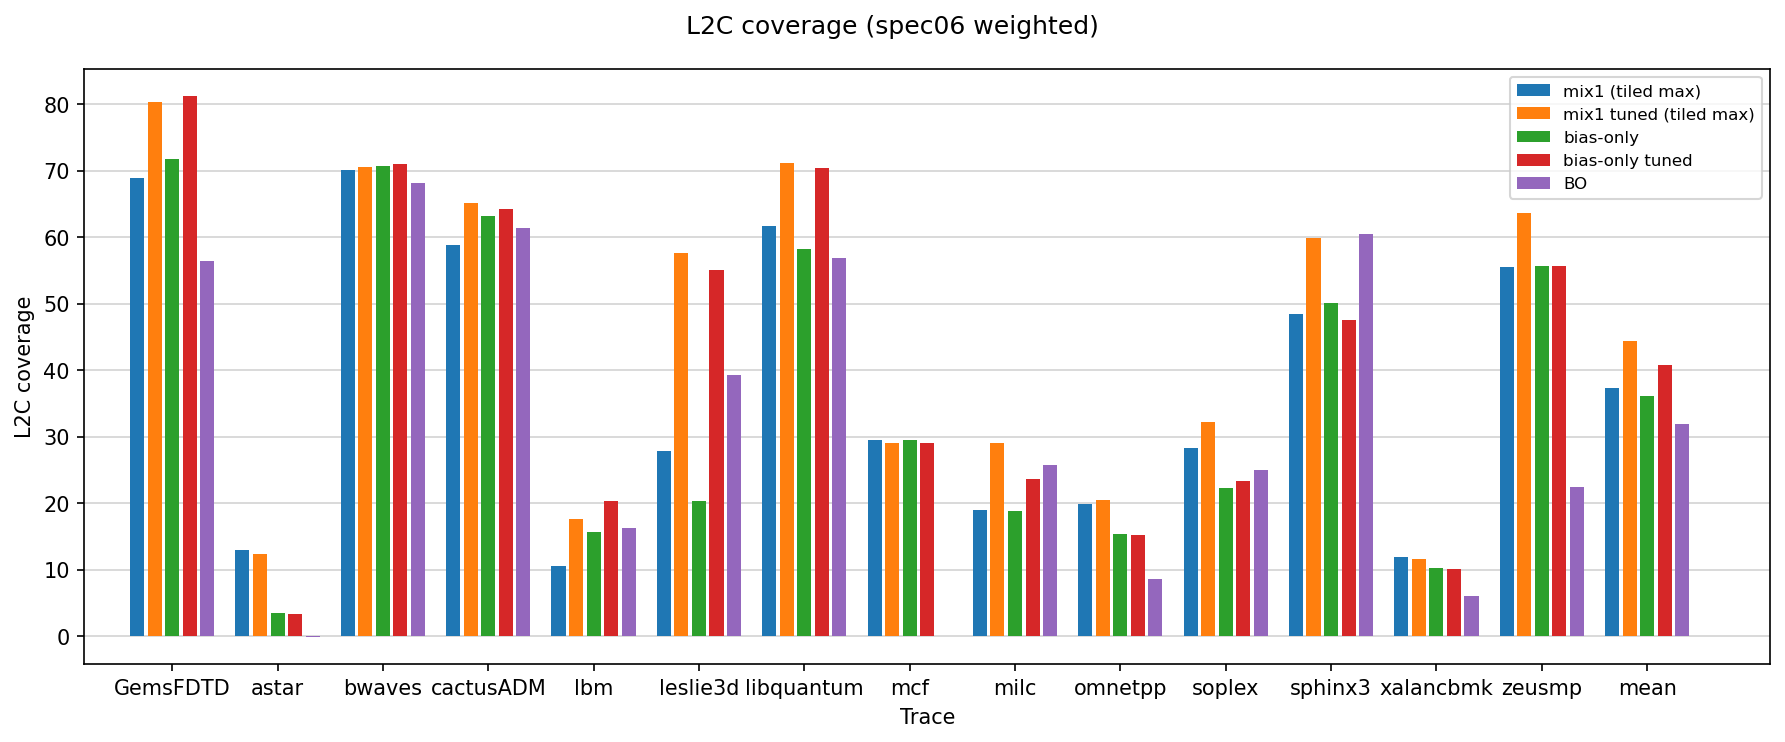

In [4]:
bias_df = {
    'mix1 (tiled max)': dfs['degree1_tiled_max']['Delta_Path, PC_Delta'],
    #'mix2 (tiled max)': dfs['degree1_tiled_max']['Delta_Path, PC_Delta, Page'],
    #'mix3 (tiled max)': dfs['degree1_tiled_max']['Delta_Path, Offset, PC_Delta, Page'],
    'mix1 tuned (tiled max)': dfs['degree1_tiled_max_tuned']['Delta_Path, PC_Delta'],
    #'mix2 tuned (tiled max)': dfs['degree1_tiled_max_tuned']['Delta_Path, PC_Delta, Page'],
    #'mix3 tuned (tiled max)': dfs['degree1_tiled_max_tuned']['Delta_Path, Offset, PC_Delta, Page'],
    'bias-only': dfs['degree1_biasonly']['pythia'],
    'bias-only tuned': dfs['degree1_biasonly_tuned']['pythia'],
    'BO': dfs['degree1_baseline']['bo'],
    #'SPP': dfs['degree1_baseline']['spp_dev2'],
    #'Bingo': dfs['degree1_baseline']['bingo'],
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
plots.plot_everything(bias_df, suites=suites, metrics=metrics, 
                      legend_kwargs=legend_kwargs, dpi=dpi, figsize=(12,5))

# Tables

## mix1 vs. bias-only, BO

In [5]:
tables.table_everything(bias_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

,mix1 (tiled max),mix1 tuned (tiled max),bias-only,bias-only tuned,BO
run_name,,,,,
GemsFDTD_weighted,75.649998,72.198501,81.741021,76.704393,71.075771
astar_weighted,7.463633,7.316200,5.856653,5.798031,0.023604
bwaves_weighted,51.569444,48.278679,57.501151,48.990479,56.428048
cactusADM_weighted,11.251756,10.527623,10.926957,10.193434,11.239625
lbm_weighted,20.790960,22.930071,27.357697,33.673291,28.889684
leslie3d_weighted,45.776763,59.854514,41.816151,64.966402,59.483881
libquantum_weighted,55.211937,55.910974,54.688553,57.830102,69.749443
mcf_weighted,31.020467,30.411074,31.077147,30.419094,0.031655
milc_weighted,8.397334,14.057256,10.947593,13.189557,6.193407


L2C_issued_prefetches


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

,mix1 (tiled max),mix1 tuned (tiled max),bias-only,bias-only tuned,BO
run_name,,,,,
GemsFDTD_weighted,1.782242e+06,1.725712e+06,1.818680e+06,1.742374e+06,1.921175e+06
astar_weighted,1.729843e+06,1.712435e+06,1.741121e+06,1.732833e+06,1.777900e+05
bwaves_weighted,2.407000e+03,2.390000e+03,2.406000e+03,2.391000e+03,2.326000e+03
cactusADM_weighted,4.412050e+05,3.960750e+05,4.330600e+05,4.203190e+05,3.187610e+05
lbm_weighted,2.884250e+05,2.608900e+05,3.463080e+05,3.032130e+05,3.699850e+05
leslie3d_weighted,1.379578e+06,1.216023e+06,1.378003e+06,1.269374e+06,1.115247e+06
libquantum_weighted,1.659577e+06,1.497088e+06,1.687662e+06,1.403325e+06,1.850484e+06
mcf_weighted,5.413218e+06,5.396538e+06,5.419218e+06,5.396357e+06,4.600000e+03
milc_weighted,1.484578e+06,1.204904e+06,1.604593e+06,1.366873e+06,1.619771e+06


L2C_coverage


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

,mix1 (tiled max),mix1 tuned (tiled max),bias-only,bias-only tuned,BO
run_name,,,,,
GemsFDTD_weighted,68.923687,80.327476,71.772526,81.276003,56.492190
astar_weighted,12.939980,12.375671,3.484190,3.436124,-0.083097
bwaves_weighted,70.154140,70.608885,70.627060,70.977893,68.204307
cactusADM_weighted,58.834875,65.206673,63.191390,64.261957,61.366822
lbm_weighted,10.570320,17.608112,15.626451,20.301535,16.270860
leslie3d_weighted,27.903734,57.680359,20.370524,55.033565,39.285104
libquantum_weighted,61.724497,71.195942,58.227913,70.428479,56.861325
mcf_weighted,29.535827,29.060770,29.571692,29.062122,0.029760
milc_weighted,18.944355,29.134666,18.882720,23.690465,25.697670
